<a href="https://colab.research.google.com/github/saif-byte/DataSciencePortfolio/blob/main/Steel%20Industry%20Load%20Classification/load_type_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classifying load type for steel industry

In this project , we will train a model to classify load type into light load , medium load and maximum load using the features given in dataset. The data set for this project is taken from UCL data repository. We will use multiple classification algorithm and identify best parameters for them. 

In [521]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , multilabel_confusion_matrix

from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier

import pickle,requests
%matplotlib inline

##Reading and Preprocessing Data

In [ ]:
df = pd.read_csv("/content/Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
#make columns consitent
df.columns = df.columns.str.lower().str.replace(" ","_")
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
  df[col] = df[col].str.lower().str.replace(" ","_")
df.head()

,date,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm,weekstatus,day_of_week,load_type
0,01/01/2018_00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,weekday,monday,light_load
1,01/01/2018_00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,weekday,monday,light_load
2,01/01/2018_00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,weekday,monday,light_load
3,01/01/2018_01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,weekday,monday,light_load
4,01/01/2018_01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,weekday,monday,light_load


In [ ]:
#now check the dtypes of columns
df.dtypes

date                                     object
usage_kwh                               float64
lagging_current_reactive.power_kvarh    float64
leading_current_reactive_power_kvarh    float64
co2(tco2)                               float64
lagging_current_power_factor            float64
leading_current_power_factor            float64
nsm                                       int64
weekstatus                               object
day_of_week                              object
load_type                                object
dtype: object

In [ ]:
#let us delete date column as its of no use to us
del(df['date'])

In [ ]:
#we can also see a summary of our dataset 
df.describe()

,usage_kwh,lagging_current_reactive.power_kvarh,leading_current_reactive_power_kvarh,co2(tco2),lagging_current_power_factor,leading_current_power_factor,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
# we need to check if our dataset has any null value
df.isnull().sum()

usage_kwh                               0
lagging_current_reactive.power_kvarh    0
leading_current_reactive_power_kvarh    0
co2(tco2)                               0
lagging_current_power_factor            0
leading_current_power_factor            0
nsm                                     0
weekstatus                              0
day_of_week                             0
load_type                               0
dtype: int64

In [ ]:
#our dataset has no null value

In [ ]:
#now let us look at target variable
df['load_type'].unique()
#we can see that our target variable has three values

array(['light_load', 'medium_load', 'maximum_load'], dtype=object)

In [ ]:
df['load_type'].value_counts()

light_load      18072
medium_load      9696
maximum_load     7272
Name: load_type, dtype: int64

##Dataset Preparation

In [ ]:
[df.columns]

[Index(['usage_kwh', 'lagging_current_reactive.power_kvarh',
        'leading_current_reactive_power_kvarh', 'co2(tco2)',
        'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
        'weekstatus', 'day_of_week', 'load_type'],
       dtype='object')]

In [ ]:
#now we will split our dataset into test train and validation sets
df_train_full, df_test = train_test_split(df , test_size = 0.2 , random_state = 2)
df_train , df_val = train_test_split(df_train_full , test_size= 0.25 , random_state = 2)


In [ ]:
print((len(df_train) , len(df_val) , len(df_test)))

(21024, 7008, 7008)


In [ ]:
y_train = df_train.load_type.values
y_val = df_val.load_type.values

del(df_train["load_type"])
del[df_val['load_type']]

In [ ]:
#now we will do one hot encoding to our categorical variables
train_dict  = df_train.to_dict("records")
val_dict = df_val.to_dict("records")
train_dict[0]

{'co2(tco2)': 0.04,
 'day_of_week': 'tuesday',
 'lagging_current_power_factor': 90.9,
 'lagging_current_reactive.power_kvarh': 43.7,
 'leading_current_power_factor': 100.0,
 'leading_current_reactive_power_kvarh': 0.0,
 'nsm': 67500,
 'usage_kwh': 95.29,
 'weekstatus': 'weekday'}

In [ ]:
#now we can use this list of dictionaries to use in DictVectorizer
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [ ]:
dv.get_feature_names_out()

array(['co2(tco2)', 'day_of_week=friday', 'day_of_week=monday',
       'day_of_week=saturday', 'day_of_week=sunday',
       'day_of_week=thursday', 'day_of_week=tuesday',
       'day_of_week=wednesday', 'lagging_current_power_factor',
       'lagging_current_reactive.power_kvarh',
       'leading_current_power_factor',
       'leading_current_reactive_power_kvarh', 'nsm', 'usage_kwh',
       'weekstatus=weekday', 'weekstatus=weekend'], dtype=object)

In [ ]:
#now we will use three different models that is logistic regression , random forest and ExtraTreesClassifier

##Logistic Regression

In [ ]:
lr = LogisticRegression(solver = 'liblinear',random_state = 2)
lr.fit(X_train , y_train)
y_pred = lr.predict_proba(X_val)


In [ ]:
roc_auc_score(y_val,y_pred , multi_class = 'ovr')

0.8860570964476172

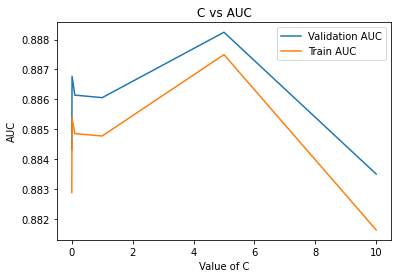

In [ ]:
#let us see if we can further improve our auc score
aucs = []
aucs_train = []
for c in [0.001 , 0.01 , 0.1 , 1 , 5 ,10]:
  lr = LogisticRegression(solver = 'liblinear',random_state = 2, C=c)
  lr.fit(X_train , y_train)
  y_pred = lr.predict_proba(X_val)
  y_pred_train = lr.predict_proba(X_train)
  auc = roc_auc_score(y_val,y_pred , multi_class = 'ovr')
  auc_train = roc_auc_score(y_train,y_pred_train , multi_class = 'ovr')  
  aucs.append(auc)
  aucs_train.append(auc_train)
plt.plot([0.001 , 0.01 , 0.1 , 1 , 5 ,10] , aucs, label = "Validation AUC")
plt.plot([0.001 , 0.01 , 0.1 , 1 , 5 ,10] , aucs_train , label = "Train AUC")
plt.xlabel("Value of C")
plt.ylabel("AUC")
plt.title("C vs AUC")
plt.legend()

In [ ]:
#as we can see that best auc is acheivable when value of C is 5 but its not much different than our default value t
#that is 88.6% so we go with default parameter value

lr = LogisticRegression(solver = "liblinear" , random_state = 2, C=5)
lr.fit(X_train , y_train)
y_pred = lr.predict(X_val)
cm = confusion_matrix(y_val , y_pred)

Text(33.0, 0.5, 'Truth')

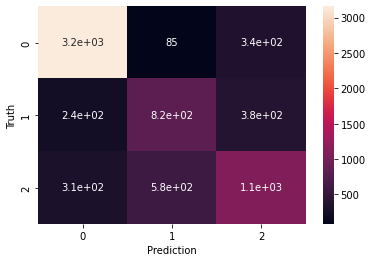

In [ ]:
sns.heatmap(cm ,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

Text(33.0, 0.5, 'Truth')

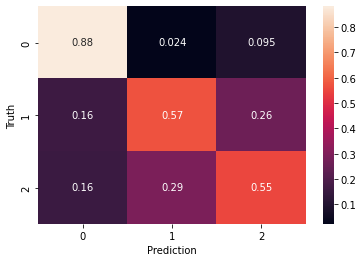

In [ ]:
def percent_cm(cm):
  return np.array([cm[0]/cm[0].sum(),
  cm[1]/cm[1].sum(),
  cm[2]/cm[2].sum()])

sns.heatmap(percent_cm(cm) , annot=True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [ ]:
#we can see that our model has done pretty good job in predicting the class 0 , 88% of the values of class light_load  
#are predicted correctly , but it has not done very well in predicting other classes as almost 20% of values of 
#medium_load and almost 44% of maximum_load class are predicted wrong.

##Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
y_pred = rf.predict_proba(X_val)
roc_auc_score(y_val , y_pred , multi_class = 'ovr')

0.98173953394442

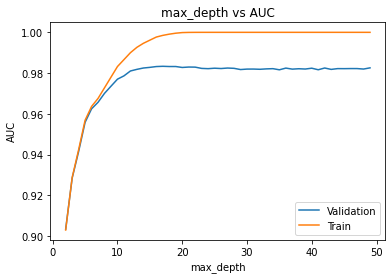

In [ ]:
#as we can see that this model is overfitting, let us tune max_depth
max_depth = np.arange(2 , 50 , 1)
aucs = []
aucs_train = []
for d in max_depth:
  rf = RandomForestClassifier(max_depth = d)
  rf.fit(X_train , y_train)
  y_pred = rf.predict_proba(X_val)
  y_pred_train = rf.predict_proba(X_train)
  auc = roc_auc_score(y_val , y_pred , multi_class = 'ovr')
  auc_train = roc_auc_score(y_train , y_pred_train , multi_class = 'ovr')
  aucs.append(auc)
  aucs_train.append(auc_train)

plt.plot(max_depth , aucs , label = "Validation")
plt.plot(max_depth , aucs_train , label = "Train")
plt.xlabel("max_depth")
plt.ylabel("AUC")
plt.title("max_depth vs AUC")
plt.legend()

In [ ]:
#we can take max_depth as 10 for our model

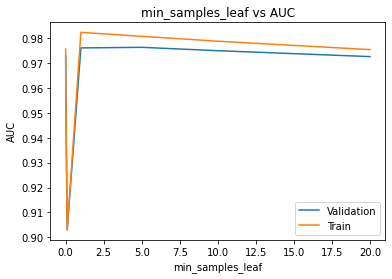

In [ ]:
#let us also tune min_samples_leaf
min_samples_leaf = [0.001 , 0.01 , 0.1 , 1 , 5, 10 ,20]
aucs = []
aucs_train = []
for m in min_samples_leaf:
  rf = RandomForestClassifier(max_depth = 10 , min_samples_leaf = m)
  rf.fit(X_train , y_train)
  y_pred = rf.predict_proba(X_val)
  y_pred_train = rf.predict_proba(X_train)
  auc = roc_auc_score(y_val , y_pred , multi_class = 'ovr')
  auc_train = roc_auc_score(y_train , y_pred_train , multi_class = 'ovr')
  aucs.append(auc)
  aucs_train.append(auc_train)

plt.plot(min_samples_leaf , aucs , label = "Validation")
plt.plot(min_samples_leaf , aucs_train , label = "Train")
plt.xlabel("min_samples_leaf")
plt.ylabel("AUC")
plt.title("min_samples_leaf vs AUC")
plt.legend()

In [ ]:
#as we can see for every values its almost same so we go with default value

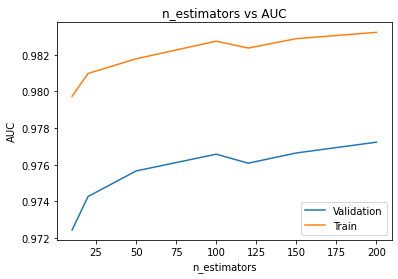

In [ ]:
#now let us look at number of estimators
n_estimators = [10,20,50,100,120,150,200]
aucs = []
aucs_train = []
for n in n_estimators:
  rf = RandomForestClassifier(n_estimators = n , max_depth = 10)
  rf.fit(X_train , y_train)
  y_pred = rf.predict_proba(X_val)
  y_pred_train = rf.predict_proba(X_train)
  auc = roc_auc_score(y_val , y_pred , multi_class = 'ovr')
  auc_train = roc_auc_score(y_train , y_pred_train , multi_class = 'ovr')
  aucs.append(auc)
  aucs_train.append(auc_train)

plt.plot(n_estimators , aucs , label = "Validation")
plt.plot(n_estimators , aucs_train , label = "Train")
plt.xlabel("n_estimators")
plt.ylabel("AUC")
plt.title("n_estimators vs AUC")
plt.legend()


In [ ]:
#as we can see that default value that is 100 is best 

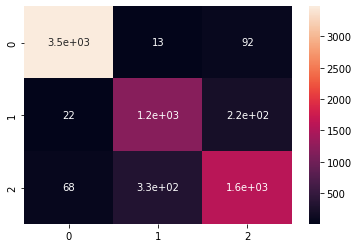

In [ ]:
rf = RandomForestClassifier(max_depth = 10)
rf.fit(X_train , y_train)
y_pred = rf.predict(X_val)
cm = confusion_matrix(y_val , y_pred)
sns.heatmap(cm , annot=True)

Text(33.0, 0.5, 'Predictions')

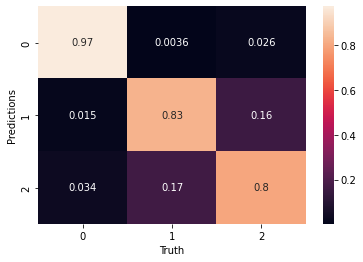

In [ ]:
sns.heatmap(percent_cm(cm) , annot=True)
plt.xlabel("Truth")
plt.ylabel("Predictions")

In [ ]:
# we can see that our model done a great job in classifying all classes with more than 80% accuracay

##ExtraTreesClassifer

In [ ]:
et = ExtraTreesClassifier()
et.fit(X_train , y_train)
y_pred =et.predict_proba(X_val)
roc_auc_score(y_val , y_pred , multi_class = "ovr")

0.973265742907402

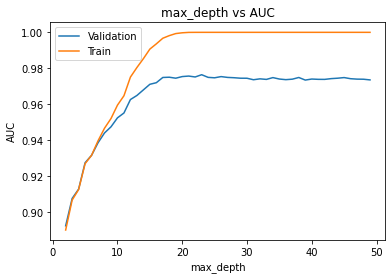

In [ ]:
#let us tune some parameter to see if our model improves
max_depth = np.arange(2 , 50 , 1)
aucs = []
aucs_train = []
for d in max_depth:
  et = ExtraTreesClassifier(max_depth = d)
  et.fit(X_train , y_train)
  y_pred = et.predict_proba(X_val)
  y_pred_train = et.predict_proba(X_train)
  auc = roc_auc_score(y_val , y_pred , multi_class = 'ovr')
  auc_train = roc_auc_score(y_train , y_pred_train , multi_class = 'ovr')
  aucs.append(auc)
  aucs_train.append(auc_train)

plt.plot(max_depth , aucs , label = "Validation")
plt.plot(max_depth , aucs_train , label = "Train")
plt.xlabel("max_depth")
plt.ylabel("AUC")
plt.title("max_depth vs AUC")
plt.legend()

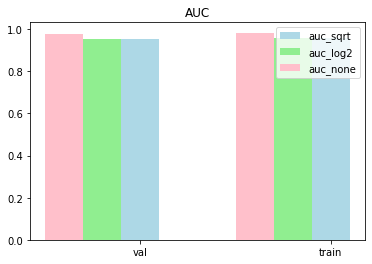

In [ ]:
#as we can see that after max_depth=10 our value does not improve much so we will take 10 as our depth
#let us also tune max_feature parameter

def train_et(feature):
  dict_ = {}
  et = ExtraTreesClassifier(max_depth = 10 , max_features = feature)
  et.fit(X_train , y_train)
  y_pred = et.predict_proba(X_val)
  y_pred_train = et.predict_proba(X_train)
  dict_["val"] = roc_auc_score(y_val , y_pred , multi_class = 'ovr')
  dict_["train"] = roc_auc_score(y_train , y_pred_train, multi_class = 'ovr')
  return dict_


auc_sqrt = train_et('sqrt')
auc_log2 = train_et('log2')
auc_none = train_et(None)

X = np.arange(len(auc_sqrt))
ax = plt.subplot(111)
ax.bar(X, auc_sqrt.values(), width=0.2, color='lightblue', align='center')
ax.bar(X-0.2, auc_log2.values(), width=0.2, color='lightgreen', align='center')
ax.bar(X-0.4, auc_none.values(), width=0.2, color='pink', align='center')
ax.legend(('auc_sqrt','auc_log2','auc_none'))
plt.xticks(X, auc_sqrt.keys())
plt.title("AUC")
plt.show()

In [ ]:
#we can see that default values for max_features is optimal

Text(33.0, 0.5, 'Predictions')

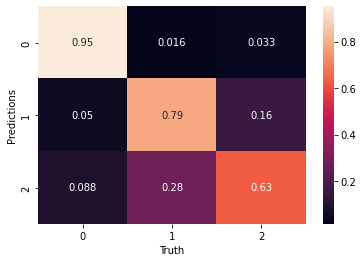

In [ ]:
#let us make a confusion matrix for ur model
et = ExtraTreesClassifier(max_depth = 10)
et.fit(X_train , y_train)
y_pred = et.predict(X_val)
cm = confusion_matrix(y_val , y_pred)
sns.heatmap(percent_cm(cm) , annot=True)
plt.xlabel("Truth")
plt.ylabel("Predictions")

In [ ]:
#now let us check our models on test sets
y_test = df_test.load_type.values
del(df_test['load_type'])

In [ ]:
test_dict = df_test.to_dict("records")
X_test = dv.transform(test_dict)

In [ ]:
y_pred_lr =  lr.predict_proba(X_test)
auc_lr = roc_auc_score(y_test ,y_pred_lr ,multi_class= 'ovr')
y_pred_rf =  rf.predict_proba(X_test)
auc_rf = roc_auc_score(y_test ,y_pred_rf ,multi_class= 'ovr')
y_pred_et =  et.predict_proba(X_test)
auc_et = roc_auc_score(y_test ,y_pred_et ,multi_class= 'ovr')

print(f'logistic regression auc: {auc_lr}\nRandomForestClassifier: {auc_rf}\nExtraTreesClassifier: {auc_et}')

logistic regression auc: 0.8894237719515025
RandomForestClassifier: 0.9740310717212921
ExtraTreesClassifier: 0.9515785915744996


In [ ]:
#we can see that RandomForestClassifier model is best , so we save it.

with open('load_type.bin','wb') as f_out:
  pickle.dump((dv,rf), f_out)

##Real World Problem

In [ ]:
df.iloc[3241].to_dict()

{'co2(tco2)': 0.02,
 'day_of_week': 'saturday',
 'lagging_current_power_factor': 92.11,
 'lagging_current_reactive.power_kvarh': 17.32,
 'leading_current_power_factor': 100.0,
 'leading_current_reactive_power_kvarh': 0.0,
 'load_type': 'maximum_load',
 'nsm': 66600,
 'usage_kwh': 40.97,
 'weekstatus': 'weekend'}

In [540]:
att = {'co2(tco2)': 0.02,
 'day_of_week': 'saturday',
 'lagging_current_power_factor': 92.11,
 'lagging_current_reactive.power_kvarh': 17.32,
 'leading_current_power_factor': 100.0,
 'leading_current_reactive_power_kvarh': 0.0,
 'nsm': 66600,
 'usage_kwh': 40.97,
 'weekstatus': 'weekend'}

url = 'http://localhost:9696/predict'
response = requests.post(url, json=att) 
result = response.json()
result

{'load_type': 'maximum_load'}

Our model has correctly predicted the result. 
In this project , we have trained three different models that are Logistic Regression, Random Tree Classifier and Extra Tree Classifier. then we tuned each model to find the best auc score. we also evaluated each model using heatmaps of confusion matrix. In the end we fond that Random Forest Classifier is the best model for this dataset. so we saved this model and serve it on web usinf Flask